In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [180]:
df =pd.read_excel("C:\\Users\\data2\\OneDrive\\Masaüstü\\codeware\\TASKS\\task2\\daily.xlsx")

In [181]:
df.head()

,date,daily-temp,worker
0,2/1/1989,16.1,ali
1,2/2/1989,14.4,ali
2,2/3/1989,16.3,ali
3,2/4/1989,15.7,ali
4,2/5/1989,14.2,ali


In [182]:
df.info(),len(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        699 non-null    object 
 1   daily-temp  686 non-null    float64
 2   worker      699 non-null    object 
dtypes: float64(1), object(2)
memory usage: 16.5+ KB


(None, 699)

# 1.GOREV

In [183]:
df["date"] =pd.to_datetime(df["date"])

In [184]:
df.info(),df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        699 non-null    datetime64[ns]
 1   daily-temp  686 non-null    float64       
 2   worker      699 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 16.5+ KB


(None,
         date  daily-temp worker
 0 1989-02-01        16.1    ali
 1 1989-02-02        14.4    ali
 2 1989-02-03        16.3    ali
 3 1989-02-04        15.7    ali
 4 1989-02-05        14.2    ali)

In [185]:
onbeshaziran= pd.to_datetime("1989-06-15")

In [186]:
df = df[df["date"]>onbeshaziran]

In [187]:
df = df.reset_index(drop=True)
df

,date,daily-temp,worker
0,1989-06-16,9.7,hamza
1,1989-06-17,11.2,hamza
2,1989-06-18,10.2,hamza
3,1989-06-19,10.1,hamza
4,1989-06-20,8.1,hamza
...,...,...,...
559,1990-12-27,14.0,mahmut
560,1990-12-28,13.6,mahmut
561,1990-12-29,13.5,mahmut
562,1990-12-30,15.7,mahmut


In [188]:
df.rename(columns={"daily-temp":"temp"},inplace=True)

# 2.GOREV

In [189]:
df['date'] = pd.to_datetime(df['date'])

In [190]:
nan_indeks = df[df['temp'].isnull()].index

In [195]:
for i in nan_indeks:
    oncekiw = df.loc[i, 'date'] - pd.DateOffset(weeks=1)
    sonrakiw = df.loc[i, 'date'] + pd.DateOffset(weeks=1)
    
    
    if oncekiw in df['date'].values:
        onceki_sicaklik = df.loc[df['date'] == oncekiw, 'temp'].values[0]
    else:
        onceki_sicaklik = None
    
    
    if sonrakiw in df['date'].values:
        sonraki_sicaklik = df.loc[df['date'] == sonrakiw, 'temp'].values[0]
    else:
        sonraki_sicaklik = None
    
    
    if pd.notnull(onceki_sicaklik) and pd.notnull(sonraki_sicaklik):
        df.loc[i, 'temp'] = (onceki_sicaklik + sonraki_sicaklik) / 2
    elif pd.notnull(onceki_sicaklik):
        df.loc[i, 'temp'] = onceki_sicaklik / 2
    elif pd.notnull(sonraki_sicaklik):
        df.loc[i, 'temp'] = sonraki_sicaklik / 2
    else:
        df.loc[i, 'temp'] = None

In [197]:
nan_indeks

Index([103, 287, 332, 352, 383, 418, 449, 484, 515, 548], dtype='int64')

# 3.GOREV

# Pandas  Kutuphanesi DateTime 

In [198]:
df["day"]=df["date"].dt.day

In [199]:
def hafta(x):
    if x <= 7:
        return 1
    elif x <= 14:
        return 2
    elif x <= 21:
        return 3
    elif x <= 28:
        return 4
    else:
        return 5

In [200]:
df["week"] = df["day"].apply(hafta)

In [201]:
df["month"] = df["date"].dt.month

In [202]:
df["year"] = df["date"].dt.year

In [203]:
df["weekday"] =df["date"].dt.weekday

df["isweekday"]=df["week"].apply(isweekday)

In [204]:
df["isweekend"] = df["weekday"].apply(lambda x:"Cumartesi" if x==5 else ("Pazar" if x==6 else "Hafta ici"))

# 4.GOREV

In [205]:
df

,date,temp,worker,day,week,month,year,weekday,isweekend
0,1989-06-16,9.7,hamza,16,3,6,1989,4,Hafta ici
1,1989-06-17,11.2,hamza,17,3,6,1989,5,Cumartesi
2,1989-06-18,10.2,hamza,18,3,6,1989,6,Pazar
3,1989-06-19,10.1,hamza,19,3,6,1989,0,Hafta ici
4,1989-06-20,8.1,hamza,20,3,6,1989,1,Hafta ici
...,...,...,...,...,...,...,...,...,...
559,1990-12-27,14.0,mahmut,27,4,12,1990,3,Hafta ici
560,1990-12-28,13.6,mahmut,28,4,12,1990,4,Hafta ici
561,1990-12-29,13.5,mahmut,29,5,12,1990,5,Cumartesi
562,1990-12-30,15.7,mahmut,30,5,12,1990,6,Pazar


In [206]:
dfm =df

In [207]:
dfm = dfm.drop(columns={"temp","worker"})
dfm

,date,day,week,month,year,weekday,isweekend
0,1989-06-16,16,3,6,1989,4,Hafta ici
1,1989-06-17,17,3,6,1989,5,Cumartesi
2,1989-06-18,18,3,6,1989,6,Pazar
3,1989-06-19,19,3,6,1989,0,Hafta ici
4,1989-06-20,20,3,6,1989,1,Hafta ici
...,...,...,...,...,...,...,...
559,1990-12-27,27,4,12,1990,3,Hafta ici
560,1990-12-28,28,4,12,1990,4,Hafta ici
561,1990-12-29,29,5,12,1990,5,Cumartesi
562,1990-12-30,30,5,12,1990,6,Pazar


In [208]:
dfm_excel ="dfm_excel.xlsx"

In [209]:
df.to_excel(dfm_excel)

In [210]:
dff1 =pd.read_excel("C:\\Users\\data2\\OneDrive\\Masaüstü\\codeware\\TASKS\\task2\\dfm_excel.xlsx")

In [211]:
dff1.tail()

,Unnamed: 0,date,temp,worker,day,week,month,year,weekday,isweekend
559,559,1990-12-27,14.0,mahmut,27,4,12,1990,3,Hafta ici
560,560,1990-12-28,13.6,mahmut,28,4,12,1990,4,Hafta ici
561,561,1990-12-29,13.5,mahmut,29,5,12,1990,5,Cumartesi
562,562,1990-12-30,15.7,mahmut,30,5,12,1990,6,Pazar
563,563,1990-12-31,13.0,mahmut,31,5,12,1990,0,Hafta ici


In [212]:
dff2 =pd.read_excel("C:\\Users\\data2\\OneDrive\\Masaüstü\\codeware\\TASKS\\task2\\daily.xlsx")

In [213]:
dff2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        699 non-null    object 
 1   daily-temp  686 non-null    float64
 2   worker      699 non-null    object 
dtypes: float64(1), object(2)
memory usage: 16.5+ KB


In [214]:
dff1 = dff1.drop(columns={"Unnamed: 0"})

In [215]:
dff2 = dff2.rename(columns={"daily-temp":"temp"})
dff2["date"]=pd.to_datetime(dff2["date"])

In [216]:
#df = pd.concat([dff1,dff2])

In [217]:
df = pd.merge(dff1, dff2, on=['date', 'temp',"worker"], how='inner')
df.head()

,date,temp,worker,day,week,month,year,weekday,isweekend
0,1989-06-16,9.7,hamza,16,3,6,1989,4,Hafta ici
1,1989-06-17,11.2,hamza,17,3,6,1989,5,Cumartesi
2,1989-06-18,10.2,hamza,18,3,6,1989,6,Pazar
3,1989-06-19,10.1,hamza,19,3,6,1989,0,Hafta ici
4,1989-06-20,8.1,hamza,20,3,6,1989,1,Hafta ici


# 6.GOREV

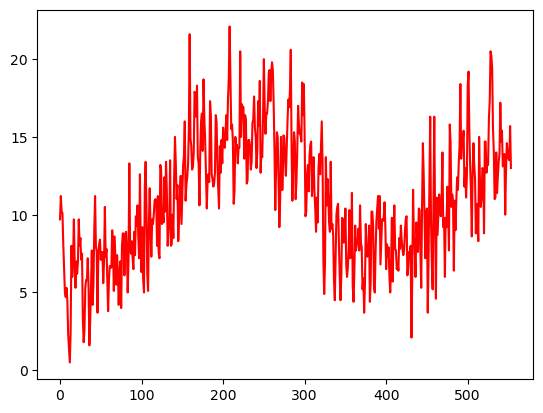

In [218]:
plt.plot(df["temp"],color="red")
plt.show()

In [219]:
veri1=df[df["date"].dt.year==1989]
veri2=df[df["date"].dt.year==1990]

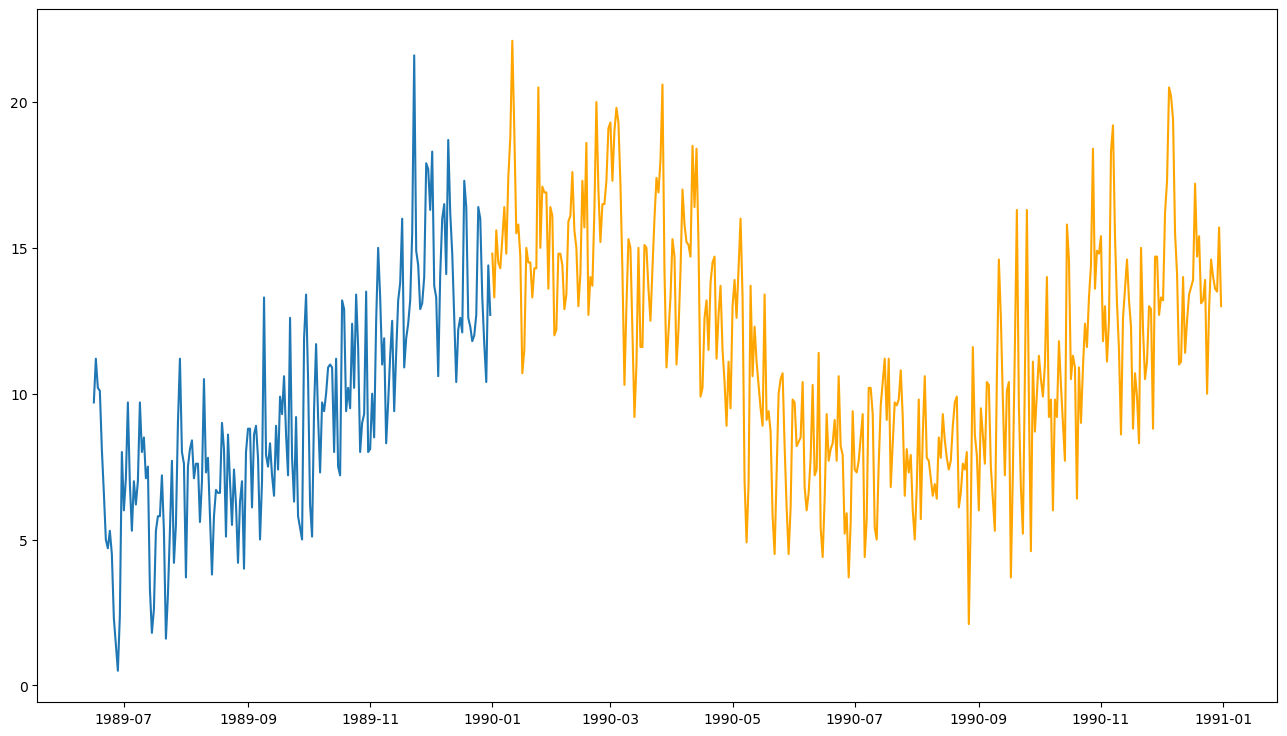

In [220]:
plt.figure(figsize=(16,9))
plt.plot(veri1["date"],veri1["temp"])
plt.plot(veri2["date"],veri2["temp"], color ="orange")

In [221]:
df.head()

,date,temp,worker,day,week,month,year,weekday,isweekend
0,1989-06-16,9.7,hamza,16,3,6,1989,4,Hafta ici
1,1989-06-17,11.2,hamza,17,3,6,1989,5,Cumartesi
2,1989-06-18,10.2,hamza,18,3,6,1989,6,Pazar
3,1989-06-19,10.1,hamza,19,3,6,1989,0,Hafta ici
4,1989-06-20,8.1,hamza,20,3,6,1989,1,Hafta ici


# 7.GOREV

In [222]:
onaylayan_isci=df["worker"].value_counts()
onaylayan_isci

worker
hamza     204
ahmet     111
kemal      73
mehmet     58
yunus      57
mahmut     29
umut       22
Name: count, dtype: int64

In [223]:
df_onaylayan=("df-onaylayan-isci_excel.xlsx")

In [224]:
df.to_excel(df_onaylayan)

In [225]:
df["kac_gun_calisti"]=df["worker"].apply(lambda x:250 if x=="hamza" else None)

In [227]:
df[df["worker"]=="hamza"]
#lambda fonksiyonunu tek seferde  yaz

,date,temp,worker,day,week,month,year,weekday,isweekend,kac_gun_calisti
0,1989-06-16,9.7,hamza,16,3,6,1989,4,Hafta ici,250.0
1,1989-06-17,11.2,hamza,17,3,6,1989,5,Cumartesi,250.0
2,1989-06-18,10.2,hamza,18,3,6,1989,6,Pazar,250.0
3,1989-06-19,10.1,hamza,19,3,6,1989,0,Hafta ici,250.0
4,1989-06-20,8.1,hamza,20,3,6,1989,1,Hafta ici,250.0
...,...,...,...,...,...,...,...,...,...,...
199,1990-01-02,13.3,hamza,2,1,1,1990,1,Hafta ici,250.0
200,1990-01-03,15.6,hamza,3,1,1,1990,2,Hafta ici,250.0
201,1990-01-04,14.5,hamza,4,1,1,1990,3,Hafta ici,250.0
202,1990-01-05,14.3,hamza,5,1,1,1990,4,Hafta ici,250.0


# 8.GOREV

In [228]:
df

,date,temp,worker,day,week,month,year,weekday,isweekend,kac_gun_calisti
0,1989-06-16,9.7,hamza,16,3,6,1989,4,Hafta ici,250.0
1,1989-06-17,11.2,hamza,17,3,6,1989,5,Cumartesi,250.0
2,1989-06-18,10.2,hamza,18,3,6,1989,6,Pazar,250.0
3,1989-06-19,10.1,hamza,19,3,6,1989,0,Hafta ici,250.0
4,1989-06-20,8.1,hamza,20,3,6,1989,1,Hafta ici,250.0
...,...,...,...,...,...,...,...,...,...,...
549,1990-12-27,14.0,mahmut,27,4,12,1990,3,Hafta ici,NaN
550,1990-12-28,13.6,mahmut,28,4,12,1990,4,Hafta ici,NaN
551,1990-12-29,13.5,mahmut,29,5,12,1990,5,Cumartesi,NaN
552,1990-12-30,15.7,mahmut,30,5,12,1990,6,Pazar,NaN


In [229]:
adet_isci = df.worker.unique()

In [230]:
adet_isci

array(['hamza', 'mehmet', 'umut', 'ahmet', 'kemal', 'yunus', 'mahmut'],
      dtype=object)

In [231]:
bos_df = pd.DataFrame(columns=["gun","ay","yil","haftasonumu","sicaklik","tarih","calisan_isim"])

In [232]:
bos_df

,gun,ay,yil,haftasonumu,sicaklik,tarih,calisan_isim


In [233]:
for i  in adet_isci:
    isci_df=df[df["worker"]==i]

In [234]:
for index, row in df.iterrows():
    new_row = {
        'gun': row['weekday'],
        'ay': row['month'],
        'yil': row['year'],
        'haftasonumu': row['isweekend'],
        'sicaklik': row['temp'],
        'tarih': row['date'],
        'calisan_isim': row['worker']
    }
    bos_df = pd.concat([bos_df, pd.DataFrame(new_row, index=[0])], ignore_index=True)
    #iterrows daha cok ogren
    

In [235]:
bos_df

,gun,ay,yil,haftasonumu,sicaklik,tarih,calisan_isim
0,4,6,1989,Hafta ici,9.7,1989-06-16,hamza
1,5,6,1989,Cumartesi,11.2,1989-06-17,hamza
2,6,6,1989,Pazar,10.2,1989-06-18,hamza
3,0,6,1989,Hafta ici,10.1,1989-06-19,hamza
4,1,6,1989,Hafta ici,8.1,1989-06-20,hamza
...,...,...,...,...,...,...,...
549,3,12,1990,Hafta ici,14.0,1990-12-27,mahmut
550,4,12,1990,Hafta ici,13.6,1990-12-28,mahmut
551,5,12,1990,Cumartesi,13.5,1990-12-29,mahmut
552,6,12,1990,Pazar,15.7,1990-12-30,mahmut


In [236]:
path = "deneme.xlsx"

In [237]:
df.to_excel(path)

# 9.GOREV

In [238]:
work_temp =df.groupby("worker")["temp"].mean().reset_index()

worker
hamza     204
ahmet     111
kemal      73
mehmet     58
yunus      57
mahmut     29
umut       22
Name: count, dtype: int64

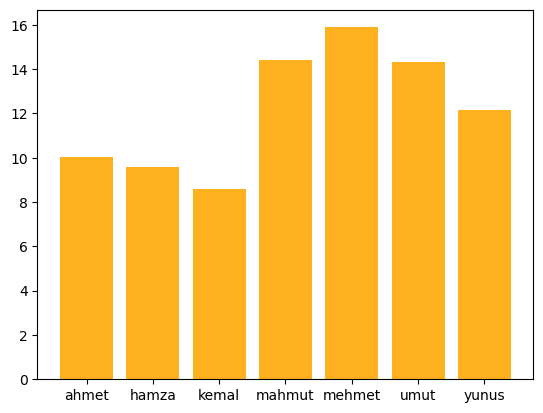

In [239]:
plt.bar(work_temp["worker"],work_temp["temp"],color="orange", alpha =0.88)

onaylayan_isci

# 10.GOREV

In [240]:
df["isweekend"] = df["weekday"].apply(lambda x:"Haftasonu" if x in [5,6] else  "Haftaici")

In [241]:
isweekend_temp = df.groupby("isweekend")["temp"].mean().reset_index()

,isweekend,temp
0,Haftaici,10.877020
1,Haftasonu,10.974051


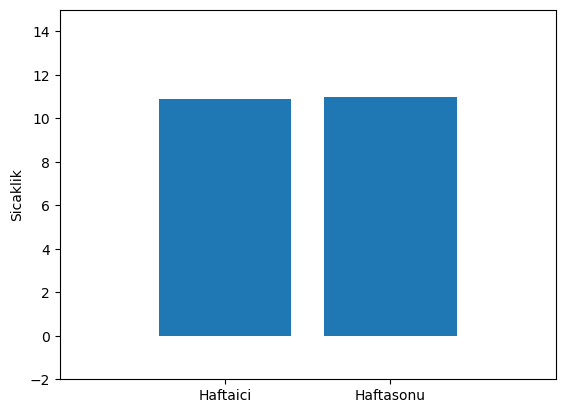

In [242]:
plt.bar(isweekend_temp["isweekend"],isweekend_temp["temp"])
plt.ylabel("Sicaklik")
plt.xlim(-1,2) , plt.ylim(-2,15)
isweekend_temp

# 11.GOREV

In [243]:
df[200:250]

,date,temp,worker,day,week,month,year,weekday,isweekend,kac_gun_calisti
200,1990-01-03,15.6,hamza,3,1,1,1990,2,Haftaici,250.0
201,1990-01-04,14.5,hamza,4,1,1,1990,3,Haftaici,250.0
202,1990-01-05,14.3,hamza,5,1,1,1990,4,Haftaici,250.0
203,1990-01-06,15.3,hamza,6,1,1,1990,5,Haftasonu,250.0
204,1990-01-07,16.4,mehmet,7,1,1,1990,6,Haftasonu,NaN
205,1990-01-08,14.8,mehmet,8,2,1,1990,0,Haftaici,NaN
206,1990-01-09,17.4,mehmet,9,2,1,1990,1,Haftaici,NaN
207,1990-01-10,18.8,mehmet,10,2,1,1990,2,Haftaici,NaN
208,1990-01-11,22.1,mehmet,11,2,1,1990,3,Haftaici,NaN
209,1990-01-12,19.0,mehmet,12,2,1,1990,4,Haftaici,NaN


In [244]:
month_temp = df.groupby("month")["temp"].mean().reset_index()

In [245]:
month_temp

,month,temp
0,1,15.577419
1,2,15.417857
2,3,14.933333
3,4,13.433333
4,5,9.733333
5,6,7.118182
6,7,7.250820
7,8,7.277049
8,9,8.924138
9,10,10.657377


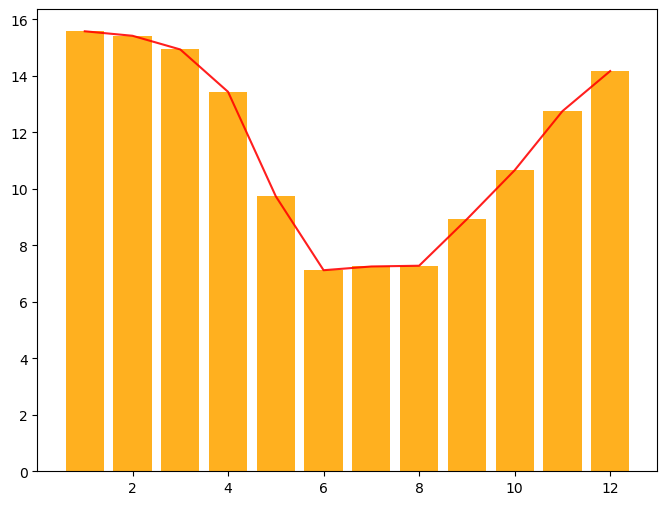

In [246]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(month_temp["month"], month_temp["temp"], color='orange', alpha=0.88, label='Bar Plot')
ax.plot(month_temp["month"], month_temp["temp"], color='red', alpha=0.88, label='Line Plot')
#fig ax 2 degisken neden yapildi ogren

In [247]:
df.head()

,date,temp,worker,day,week,month,year,weekday,isweekend,kac_gun_calisti
0,1989-06-16,9.7,hamza,16,3,6,1989,4,Haftaici,250.0
1,1989-06-17,11.2,hamza,17,3,6,1989,5,Haftasonu,250.0
2,1989-06-18,10.2,hamza,18,3,6,1989,6,Haftasonu,250.0
3,1989-06-19,10.1,hamza,19,3,6,1989,0,Haftaici,250.0
4,1989-06-20,8.1,hamza,20,3,6,1989,1,Haftaici,250.0


# 12.GOREV

In [248]:
# (BILGI) pandasta and yerine & kullanilir ! 
temmuzlar = df[df["year"].isin([1989,1990]) & df["month"].isin([7])]

In [249]:
temmuzlar.head()

,date,temp,worker,day,week,month,year,weekday,isweekend,kac_gun_calisti
15,1989-07-01,6.0,hamza,1,1,7,1989,5,Haftasonu,250.0
16,1989-07-02,7.1,hamza,2,1,7,1989,6,Haftasonu,250.0
17,1989-07-03,9.7,hamza,3,1,7,1989,0,Haftaici,250.0
18,1989-07-04,6.9,hamza,4,1,7,1989,1,Haftaici,250.0
19,1989-07-05,5.3,hamza,5,1,7,1989,2,Haftaici,250.0


In [250]:
temmuzlar_temp=temmuzlar.groupby("isweekend")["temp"].mean().reset_index()

,isweekend,temp
0,Haftaici,7.295238
1,Haftasonu,7.152632


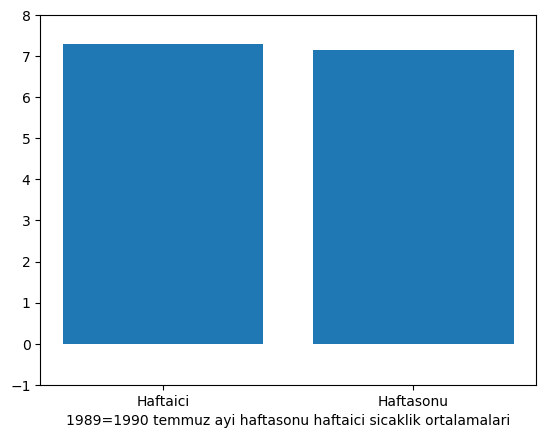

In [251]:
plt.bar(temmuzlar_temp["isweekend"],temmuzlar_temp["temp"])
plt.xlabel("1989=1990 temmuz ayi haftasonu haftaici sicaklik ortalamalari")
plt.ylim(-1,8)
temmuzlar_temp